### Deep NLP with Combined Tensorflow RandomForest Classifier

### Problem Statement

This NLP task aims to analyze two datasets involving bot and human interactions. The goal is to categorize these datasets based on the bot's recommendations.

#### What Does the Deep Learning NLP Dataset Contain?

- **Sheet1.csv**: Contains 80 user responses to a therapeutic chatbot in the `response_text` column. For example, the bot might ask: *"Describe a time when you acted as a resource for someone else?"* A user provides a response. If the response is classified as "not flagged," the user can continue interacting with the bot. However, if it is classified as "flagged," the bot redirects the user to seek further assistance.

- **Sheet2.csv**: Contains 125 resumes in the `resume_text` column. These resumes were sourced from Indeed.com using the search terms "data scientist" and "Vermont." If a resume is classified as "not flagged," the applicant can submit a revised version later. If it is classified as "flagged," the applicant is invited for an interview.

#### Why is it Worth Solving?

The objective is to determine whether new resumes or responses would be classified as "flagged" or "not flagged." This classification task is crucial for automating decision-making processes in both therapeutic and recruitment contexts.

#### Approach

The problem involves two types of data: resumes and responses. To evaluate the accuracy of the classifier, the data will be split into training and testing sets. The same classifier will be applied to solve both tasks, ensuring consistency and comparability across datasets.

In [1]:
#To begin, get the Python analytics libraries needed to process NLP using deep learning algorithms.

import numpy as np 
import pandas as pd 

import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read in the datasets.
my_file_1="Sheet_1.csv"
my_file_2="Sheet_2.csv"

bot = pd.read_csv(my_file_1,usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv(my_file_2,encoding='latin-1')

In [3]:
#Gret the first five rows of the Sheet_1 data.
bot.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [4]:
#Gret the first five rows of the Sheet_2 data.
resume.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


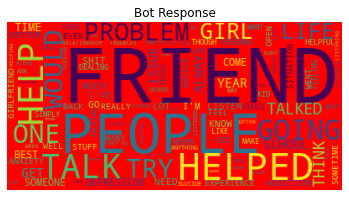

In [5]:
#Visualize the keywords for bot using WordCloud.
def cloud(text):
    wordcloud = WordCloud(background_color="red",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Bot Response")
cloud(bot['response_text'])

In [6]:
#Import additional packages to perform sentiment analysis and analyse large chunks of text.
# import pandas as pd
# df = pd.read_csv("")
from nltk.sentiment.vader import SentimentIntensityAnalyzer #nltk kütüphanesinde hazır bir sentiment Intensity Analizi var
import nltk
import re
from textblob import TextBlob # metnin olumlu-olumsuz durumuna göre size 0-1 aralığında bir değer dönmektedir. TextBlob ile amacımız yazının olumlu mu olumsuz mu içerik içerdiğini anlamaktır.
nltk.downloader.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ikenna\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Model Building

In [7]:
#Encode and transform the class or target column.
bot['label'] = Encode.fit_transform(bot['class'])

In [8]:
#Train-test-split the bot data set and get model accuracy.
x = bot.response_text
y = bot.label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

#### Random Forest

In [9]:
#Random Forest regressor.
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)
#Naive Bayes.
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.75

In [10]:
#Check to see how much data was in the test set before modeling.
x_test_dtm

<20x541 sparse matrix of type '<class 'numpy.int64'>'
	with 320 stored elements in Compressed Sparse Row format>

#### Tensor Flow

In [11]:
#Text data feature extraction. Transform the response_text data using TFIDF vectorizer.
text = bot["response_text"]

Tf_idf = CountVectorizer(max_features=256).fit_transform(text.values)

In [12]:
#Using the TSNE dimentionality reduction method, convert similarities between data points.
tsne = TSNE(
    n_components=2,
    init='random', # pca
    random_state=34,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.001s...
[t-SNE] Computed neighbors for 80 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119037
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 69.8175888, gradient norm = 0.4227443 (50 iterations in 0.048s)
[t-SNE] Iteration 100: error = 71.7578583, gradient norm = 0.3959224 (50 iterations in 0.029s)
[t-SNE] Iteration 150: error = 62.0871544, gradient norm = 0.5850121 (50 iterations in 0.022s)
[t-SNE] Iteration 200: error = 76.4642715, gradient norm = 0.3401099 (50 iterations in 0.022s)
[t-SNE] Iteration 250: error = 74.2192993, gradient norm = 0.3796955 (50 iterations in 0.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.219299
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234

In [13]:
#Change boolean with binary numbers for the bot data.
bot.replace(('flagged','not_flagged'),(1,0),inplace=True)
bot.head()

,response_id,class,response_text,label
0,response_1,0,I try and avoid this sort of conflict,1
1,response_2,1,Had a friend open up to me about his mental ad...,0
2,response_3,1,I saved a girl from suicide once. She was goin...,0
3,response_4,0,i cant think of one really...i think i may hav...,1
4,response_5,0,Only really one friend who doesn't fit into th...,1


#### Build Tensor FLow Model

In [14]:
#Import supporting libraries.
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences=bot['label'].tolist()
labels=bot['class'].tolist()

In [15]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [16]:
vocab_size = 300
embedding_dim = 16
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_sentences = [str (item) for item in training_sentences]
testing_sentences = [str (item) for item in testing_sentences]

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 16)            4800      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 102       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4,909
Trainable params: 4,909
Non-trainable params: 0
_________________________________________________________________


In [17]:
#Now build the model with thirty iterations.
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
2/2 [==============================] - 1s 186ms/step - loss: 0.6969 - accuracy: 0.3125 - val_loss: 0.6957 - val_accuracy: 0.3125
Epoch 2/30
2/2 [==============================] - 0s 19ms/step - loss: 0.6954 - accuracy: 0.3125 - val_loss: 0.6944 - val_accuracy: 0.3125
Epoch 3/30
2/2 [==============================] - 0s 19ms/step - loss: 0.6941 - accuracy: 0.3125 - val_loss: 0.6932 - val_accuracy: 0.3125
Epoch 4/30
2/2 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.6562 - val_loss: 0.6920 - val_accuracy: 0.6875
Epoch 5/30
2/2 [==============================] - 0s 20ms/step - loss: 0.6917 - accuracy: 0.6875 - val_loss: 0.6908 - val_accuracy: 0.6875
Epoch 6/30
2/2 [==============================] - 0s 21ms/step - loss: 0.6904 - accuracy: 0.6875 - val_loss: 0.6896 - val_accuracy: 0.6875
Epoch 7/30
2/2 [==============================] - 0s 18ms/step - loss: 0.6896 - accuracy: 0.6875 - val_loss: 0.6893 - val_accuracy: 0.6875
Epoch 8/30
2/2 [==========

##### Findings: 

The Random Forest rgeressor appears to have fared better than all of the Tensor Flow epoch. We increased by approximately ten percent with RandomForest.

-----------------------------------------------------------------------------------------------------------------------

### Perform Similar Analysis for the Resume data: Sheet2.csv

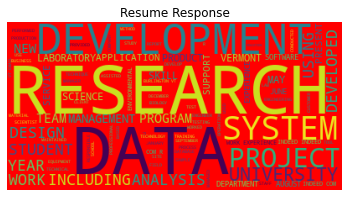

In [18]:
def cloud(text):
    wordcloud = WordCloud(background_color="red",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Resume Response")
cloud(resume['resume_text'])

### Model Building

In [19]:
#Encode and transform the class or target column.
resume['label'] = Encode.fit_transform(resume['class'])

In [20]:
#Train-test-split the resume data set and get model accuracy.
x = resume.resume_text
y = resume.label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=34)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)

### Random Forest

In [21]:
#Random Forest regressor.
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)
#Naive Bayes.
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.6875

### Tensor Flow

In [22]:
#Text data feature extraction. Transform the response_text data using TFIDF vectorizer.
text = resume["resume_text"]

Tf_idf = CountVectorizer(max_features=256).fit_transform(text.values)


In [23]:
training_size = int(len(sentences) * 0.8)

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

# Make labels into numpy arrays for use with the network later
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [24]:
vocab_size = 300
embedding_dim = 16
max_length = 25
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_sentences = [str (item) for item in training_sentences]
testing_sentences = [str (item) for item in testing_sentences]

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 16)            4800      
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 6)                 102       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 4,909
Trainable params: 4,909
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Now build the model with thirty iterations.
num_epochs = 30
history = model.fit(training_padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/30
2/2 [==============================] - 0s 114ms/step - loss: 0.6968 - accuracy: 0.3125 - val_loss: 0.6955 - val_accuracy: 0.3125
Epoch 2/30
2/2 [==============================] - 0s 19ms/step - loss: 0.6952 - accuracy: 0.3125 - val_loss: 0.6939 - val_accuracy: 0.3125
Epoch 3/30
2/2 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.3125 - val_loss: 0.6919 - val_accuracy: 0.6875
Epoch 4/30
2/2 [==============================] - 0s 20ms/step - loss: 0.6916 - accuracy: 0.6875 - val_loss: 0.6905 - val_accuracy: 0.6875
Epoch 5/30
2/2 [==============================] - 0s 20ms/step - loss: 0.6901 - accuracy: 0.6875 - val_loss: 0.6890 - val_accuracy: 0.6875
Epoch 6/30
2/2 [==============================] - 0s 18ms/step - loss: 0.6885 - accuracy: 0.6875 - val_loss: 0.6876 - val_accuracy: 0.6875
Epoch 7/30
2/2 [==============================] - 0s 19ms/step - loss: 0.6872 - accuracy: 0.6875 - val_loss: 0.6860 - val_accuracy: 0.6875
Epoch 8/30
2/2 [==========

### Conclusion

Seeing that the accuracy scores of both models are comparable, it is essential to enhance their performance to ensure the algorithms consistently and accurately classify the target column. Improving the models' accuracy can be achieved through hyperparameter tuning, feature engineering, or exploring advanced architectures. This use case demonstrates the potential of machine learning in mining and analyzing text data, making it a valuable tool for organizations dealing with large volumes of textual information. Companies focused on automating decision-making processes or extracting insights from text will find this approach highly beneficial.